<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/DTP_06_Values_Over_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP day month year.csv')

In [ ]:
data.head()

,date,day,month,year,InQuantitySLSMLD,EfDischargetoGojariaMLD,InpH,EfpH,InCOD,EfCOD,InBOD,EfBOD,InAmmonia,EfAmmonia,InSS,EfSS,InPhosphate,EfPhosphate,InFecalColiform,EfFecalColiform
0,1/10/2022,1.0,10.0,2022.0,260.01,257.37,7.52,7.46,238,8,87.1,1.4,23.4,0.20,182,2,3.52,1.31,4600,49
1,2/10/2022,2.0,10.0,2022.0,266.43,265.45,7.25,7.37,298,4,81.1,1.7,22.5,0.21,218,1,2.98,1.43,4300,27
2,3/10/2022,3.0,10.0,2022.0,290.04,285.96,7.24,7.26,296,4,68.7,2.3,20.2,0.18,158,1,3.51,1.75,7900,34
3,4/10/2022,4.0,10.0,2022.0,203.68,201.39,7.34,7.42,153,5,86.3,1.3,20.8,0.19,122,2,3.16,1.62,9400,43
4,5/10/2022,5.0,10.0,2022.0,285.10,276.07,7.51,7.38,287,7,76.9,1.9,20.2,0.20,146,2,3.08,1.27,6300,33


In [ ]:
# Extract relevant columns for time series analysis
time_series_data = data[['date', 'EfDischargetoGojariaMLD']]

In [ ]:
# Convert 'date' column to datetime format
time_series_data['date'] = pd.to_datetime(time_series_data['date'])


<ipython-input-13-5e6546ca1199>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  time_series_data['date'] = pd.to_datetime(time_series_data['date'])
<ipython-input-13-5e6546ca1199>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['date'] = pd.to_datetime(time_series_data['date'])


In [ ]:
# Set 'date' as the index
time_series_data.set_index('date', inplace=True)

In [ ]:
# Train-test split (70% train, 30% test)
train_size = int(len(time_series_data) * 0.7)
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]


In [ ]:
# Fit ARIMA model on training data
model = ARIMA(train['EfDischargetoGojariaMLD'], order=(5, 1, 0))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Forecast next 7 days for test set
forecast_days = 7
forecast = results.get_forecast(steps=forecast_days)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Get the forecasted values
forecast_values = forecast.predicted_mean

In [ ]:
# Calculate metrics on training set
train_predictions = results.predict(start=train.index[0], end=train.index[-1], typ='levels')
train_rmse = np.sqrt(mean_squared_error(train['EfDischargetoGojariaMLD'], train_predictions))
train_mae = mean_absolute_error(train['EfDischargetoGojariaMLD'], train_predictions)
train_mape = np.mean(np.abs((train['EfDischargetoGojariaMLD'] - train_predictions) / train['EfDischargetoGojariaMLD'])) * 100
train_r2 = r2_score(train['EfDischargetoGojariaMLD'], train_predictions)


In [ ]:
# Calculate metrics on test set
test_predictions = forecast_values

# Make sure the test dataset has the same number of samples as the forecast
test = test.head(len(forecast_values))

test_rmse = np.sqrt(mean_squared_error(test['EfDischargetoGojariaMLD'], test_predictions))
test_mae = mean_absolute_error(test['EfDischargetoGojariaMLD'], test_predictions)
test_mape = np.mean(np.abs((test['EfDischargetoGojariaMLD'] - test_predictions) / test['EfDischargetoGojariaMLD'])) * 100
test_r2 = r2_score(test['EfDischargetoGojariaMLD'], test_predictions)

<ipython-input-22-74c09ab73333>:9: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((test['EfDischargetoGojariaMLD'] - test_predictions) / test['EfDischargetoGojariaMLD'])) * 100
<ipython-input-22-74c09ab73333>:9: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((test['EfDischargetoGojariaMLD'] - test_predictions) / test['EfDischargetoGojariaMLD'])) * 100


In [ ]:
# Plot scatter diagrams
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

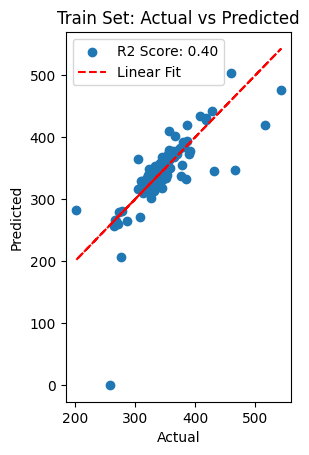

In [ ]:
# Train set
plt.subplot(1, 2, 1)
plt.scatter(train['EfDischargetoGojariaMLD'], train_predictions, label=f'R2 Score: {train_r2:.2f}')
plt.plot(train['EfDischargetoGojariaMLD'], train['EfDischargetoGojariaMLD'], color='red', linestyle='--', label='Linear Fit')
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

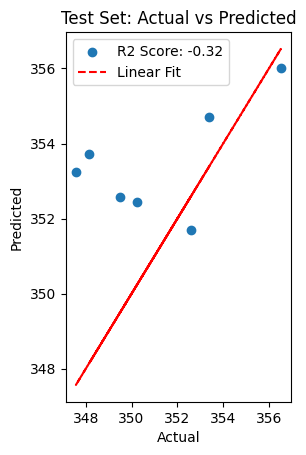

In [ ]:
# Test set
plt.subplot(1, 2, 2)
plt.scatter(test['EfDischargetoGojariaMLD'], test_predictions, label=f'R2 Score: {test_r2:.2f}')
plt.plot(test['EfDischargetoGojariaMLD'], test['EfDischargetoGojariaMLD'], color='red', linestyle='--', label='Linear Fit')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()



In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

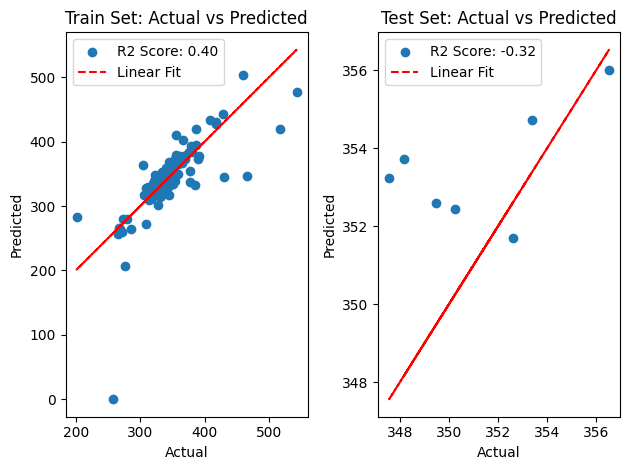

In [ ]:
# Train set
plt.subplot(1, 2, 1)
plt.scatter(train['EfDischargetoGojariaMLD'], train_predictions, label=f'R2 Score: {train_r2:.2f}')
plt.plot(train['EfDischargetoGojariaMLD'], train['EfDischargetoGojariaMLD'], color='red', linestyle='--', label='Linear Fit')
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(test['EfDischargetoGojariaMLD'], test_predictions, label=f'R2 Score: {test_r2:.2f}')
plt.plot(test['EfDischargetoGojariaMLD'], test['EfDischargetoGojariaMLD'], color='red', linestyle='--', label='Linear Fit')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()

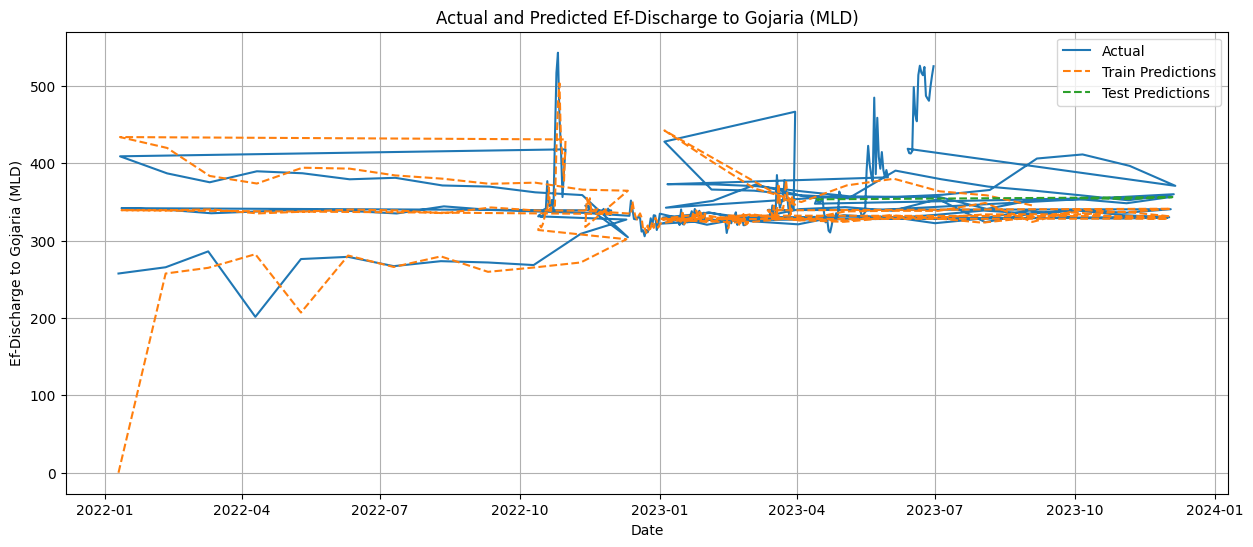

In [ ]:
# Plot line model diagram
plt.figure(figsize=(15, 6))
plt.plot(time_series_data.index, time_series_data['EfDischargetoGojariaMLD'], label='Actual')
plt.plot(train.index, train_predictions, label='Train Predictions', linestyle='dashed')
plt.plot(test.index, test_predictions, label='Test Predictions', linestyle='dashed')
plt.title('Actual and Predicted Ef-Discharge to Gojaria (MLD)')
plt.xlabel('Date')
plt.ylabel('Ef-Discharge to Gojaria (MLD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the metrics
metrics_data = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2'],
    'Train Set': [train_rmse, train_mae, train_mape, train_r2],
    'Test Set': [test_rmse, test_mae, test_mape, test_r2]
})

print(metrics_data)

  Metric  Train Set  Test Set
0   RMSE  27.709014  3.393867
1    MAE  12.942672  2.761203
2   MAPE   3.859168       NaN
3     R2   0.400533 -0.315973


In [ ]:
# Display the forecast values
forecast_data = pd.DataFrame({
    'Date': pd.date_range(test.index[-1], periods=forecast_days + 1, freq='D')[1:],
    'Forecasted Ef-Discharge to Gojaria (MLD)': forecast_values.values
})

print(forecast_data)

        Date  Forecasted Ef-Discharge to Gojaria (MLD)
0 2023-04-17                                354.713209
1 2023-04-18                                353.733012
2 2023-04-19                                356.015476
3 2023-04-20                                353.236002
4 2023-04-21                                351.690109
5 2023-04-22                                352.453307
6 2023-04-23                                352.588475


In [ ]:
# Plotting both In-CODcr and Ef-CODcr values over time for comparison
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['In-CODcr\n(mg/L)'], label='In-CODcr (mg/L)', marker='o', linestyle='-')
plt.plot(filtered_data['date'], filtered_data['Ef-CODcr\n(mg/L)'], label='Ef-CODcr (mg/L)', marker='x', linestyle='--')
plt.title('Comparison of In-CODcr and Ef-CODcr Values Over Time')
plt.xlabel('Date')
plt.ylabel('CODcr (mg/L)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Load the new Excel file to see the content and identify the sheets available
new_file_path = '/mnt/data/Data Ai.xlsx'
new_excel_data = pd.ExcelFile(new_file_path)

# Load the data from the first sheet to inspect the structure
new_data = pd.read_excel(new_file_path, sheet_name='Sheet1')

# Convert the 'date' column to datetime format for consistency
new_data['date'] = pd.to_datetime(new_data['date'], errors='coerce')

# Filter out any rows where the date conversion failed
new_filtered_data = new_data.dropna(subset=['date'])

# Plotting In-Fecal Coliform and Ef-Fecal Coliform values over time for comparison
plt.figure(figsize=(12, 6))
plt.plot(new_filtered_data['date'], new_filtered_data['In-Fecal Coliform\n(mg/L)'], label='In-Fecal Coliform (mg/L)', marker='o', linestyle='-')
plt.plot(new_filtered_data['date'], new_filtered_data['Ef-Fecal Coliform\n(mg/L)'], label='Ef-Fecal Coliform (mg/L)', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Fecal Coliform (mg/L)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plotting In-pH and Ef-pH values over time for comparison, without a title
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['In-pH'], label='In-pH', marker='o', linestyle='-')
plt.plot(filtered_data['date'], filtered_data['Ef-pH'], label='Ef-pH', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plotting In-Ammonia and Ef-Ammonia values over time for comparison, without a title
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['In-Ammonia-N\n(mg/L)'], label='In-Ammonia (mg/L)', marker='o', linestyle='-')
plt.plot(filtered_data['date'], filtered_data['Ef-Ammonia-N\n(mg/L)'], label='Ef-Ammonia (mg/L)', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Ammonia-N (mg/L)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plotting In-Phosphate and Ef-Phosphate values over time for comparison
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['In-Phosphate\n(mg/L)'], label='In-Phosphate (mg/L)', marker='o', linestyle='-')
plt.plot(filtered_data['date'], filtered_data['Ef-Phosphate\n(mg/L)'], label='Ef-Phosphate (mg/L)', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Phosphate (mg/L)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plotting the trends in In-SS and Ef-SS over time for analysis
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['In-SS\n(mg/L)'], label='In-SS (mg/L)', marker='o', linestyle='-')
plt.plot(filtered_data['date'], filtered_data['Ef-SS\n(mg/L)'], label='Ef-SS (mg/L)', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Suspended Solids (mg/L)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Check if the columns for In-BOD₅ and Ef-BOD₅ are available in the dataset
if 'In-BOD₅\n(mg/L)' in filtered_data.columns and 'Ef-BOD₅\n(mg/L)' in filtered_data.columns:
    # Plotting In-BOD₅ and Ef-BOD₅ values over time for comparison
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['date'], filtered_data['In-BOD₅\n(mg/L)'], label='In-BOD₅ (mg/L)', marker='o', linestyle='-')
    plt.plot(filtered_data['date'], filtered_data['Ef-BOD₅\n(mg/L)'], label='Ef-BOD₅ (mg/L)', marker='x', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('BOD₅ (mg/L)')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    # If the columns are not available, notify the user
    result = "The columns for In-BOD₅ and Ef-BOD₅ are not present in the dataset. Please check the data or provide additional information."

result if 'result' in locals() else None


The graph illustrates seasonal trends in water quality parameters, including "In-CODcr," "Ef-CODcr," "In-BOD₅," "Ef-BOD₅," "In-pH," and "Ef-pH" across different months. Here are some observations:

COD and BOD Trends:

The average "In-CODcr" and "In-BOD₅" values show variations over the months, indicating changes in the input water quality due to seasonal factors.
"Ef-CODcr" and "Ef-BOD₅" are consistently lower, showing effective treatment, but the level of reduction may vary seasonally.
pH Levels:

The input ("In-pH") and output ("Ef-pH") pH values generally stay within a stable range but may exhibit slight seasonal shifts.
The treatment process maintains the pH within a target range, although seasonal changes in the input might affect the process.
Seasonal Patterns:

If the input parameters tend to rise in certain months, it could be due to seasonal pollution, increased runoff, or other environmental factors.
The treatment's effectiveness may also vary slightly depending on these seasonal fluctuations.


In [ ]:
# Adding a 'month' column to identify seasonal patterns more easily
new_filtered_data['month'] = new_filtered_data['date'].dt.month

# Grouping the data by month to calculate mean values for each water quality parameter
monthly_average = new_filtered_data.groupby('month').mean()

# Plotting seasonal trends for key parameters: In-CODcr, Ef-CODcr, In-BOD₅, Ef-BOD₅, In-pH, and Ef-pH
plt.figure(figsize=(14, 8))
plt.plot(monthly_average.index, monthly_average['In-CODcr\n(mg/L)'], label='Avg In-CODcr (mg/L)', marker='o')
plt.plot(monthly_average.index, monthly_average['Ef-CODcr\n(mg/L)'], label='Avg Ef-CODcr (mg/L)', marker='x')
plt.plot(monthly_average.index, monthly_average['In-BOD₅\n(mg/L)'], label='Avg In-BOD₅ (mg/L)', marker='s')
plt.plot(monthly_average.index, monthly_average['Ef-BOD₅\n(mg/L)'], label='Avg Ef-BOD₅ (mg/L)', marker='d')
plt.plot(monthly_average.index, monthly_average['In-pH'], label='Avg In-pH', marker='^')
plt.plot(monthly_average.index, monthly_average['Ef-pH'], label='Avg Ef-pH', marker='v')

# Labeling the plot
plt.xlabel('Month')
plt.ylabel('Water Quality Parameters')
plt.title('Seasonal Trends in Water Quality Parameters')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
